In [95]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from torchmetrics import Accuracy

torch.__version__

ModuleNotFoundError: No module named 'torchmetrics'

### Agnostic device

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# Make a binary classification dataset with Scikit-Learn's make_moons() function.
# For consistency, the dataset should have 1000 samples and a random_state=42.
# Turn the data into PyTorch tensors.
# Split the data into training and test sets using train_test_split with 
# 80% training and 20% testing.

n_samples = 1000
RANDOM_SEED = 42

X, y = make_moons(
    n_samples,
    random_state=RANDOM_SEED
)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=RANDOM_SEED
)

In [6]:
def numpy_to_tensor():

    global X_train, X_test, y_train, y_test

    X_train = torch.from_numpy(X_train).type(torch.float32)
    X_test = torch.from_numpy(X_test).type(torch.float32)
    y_train = torch.from_numpy(y_train).type(torch.LongTensor)
    y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [7]:
numpy_to_tensor()

In [83]:
def put_data_on(device):

    global X_train, X_test, y_train, y_test
    X_train = X_train.to(device)
    X_test = X_test.to(device)
    y_train = y_train.to(device)
    y_test = y_test.to(device)

In [84]:
print(X_train.device)
put_data_on(device)
X_train.device

cpu


device(type='cuda', index=0)

In [85]:
print(X_train.device)
put_data_on("cpu")
X_train.device

cuda:0


device(type='cpu')

In [86]:
put_data_on(device)

### Let's plot the data to visualize

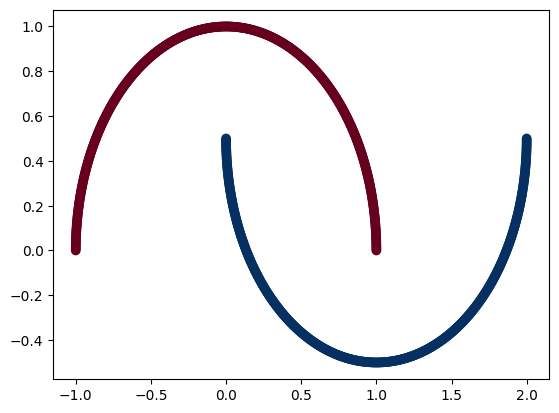

In [90]:
plt.scatter(X[:, 0], X[:, 1], c=y , cmap=plt.cm.RdBu)

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [92]:
class MoonsClassificationV1(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer_stack = nn.Sequential(

            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x:torch.tensor) -> torch.tensor:

        return self.layer_stack(x)

model_0 = MoonsClassificationV1().to(device)
model_0

MoonsClassificationV1(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [93]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

* To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.

* Train the model for long enough for it to reach over 96% accuracy.

* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.